In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Prediction Model: Linear Regression

In [236]:
class Processor:
    def __init__(self,
                 threshold : float = 2):
        self.threshold = 2
        ...

    def fit(self, dataset):
        dataset = dataset.drop(columns = "Id")
        missing_total = dataset.isna().sum()
        missing_pct = dataset.isna().sum()/dataset.isna().count()

        missing_data = pd.concat([missing_total,missing_pct], axis=1, keys=['Total','Percentage'])

        self.drop_cols = missing_data[missing_data['Percentage'] > 0.15].index
        dataset = dataset.drop(columns=self.drop_cols,axis=1)
        dataset = dataset.dropna(axis = 0)

        # z_scores = np.abs(stats.zscore(dataset["SalePrice"]))
        # dataset['Z-score'] = z_scores
        
        # dataset = dataset.drop(dataset[dataset['Z-score'] > self.threshold].index)
        # dataset = dataset.drop(columns=['Z-score','Id'])
        dataset = pd.get_dummies(dataset)
        self.final_columns = dataset.columns

        return dataset
    def transform(self, dataset):
        dataset = dataset.drop(columns = "Id")
        #missing_total = dataset.isna().sum()
        #missing_pct = dataset.isna().sum()/dataset.isna().count()

        #missing_data = pd.concat([missing_total,missing_pct], axis=1, keys=['Total','Percentage'])

        #self.drop_cols = missing_data[missing_data['Percentage'] > 0.15].index
        dataset = dataset.drop(columns=self.drop_cols,axis=1)
        dataset = dataset.fillna(0)

        # z_scores = np.abs(stats.zscore(dataset["SalePrice"]))
        # dataset['Z-score'] = z_scores
        
        # dataset = dataset.drop(dataset[dataset['Z-score'] > self.threshold].index)
        # dataset = dataset.drop(columns=['Z-score','Id'])
        dataset = pd.get_dummies(dataset)
        dataset = dataset.reindex(columns=self.final_columns).fillna(0)
        dataset = dataset.drop(columns='SalePrice')

        return dataset

In [237]:
train_df = pd.read_csv("../train.csv")
test_df = pd.read_csv("../test.csv")

In [238]:
train_df.shape

(1460, 81)

In [239]:
test_df.shape

(1459, 80)

In [240]:
processor = Processor()

In [241]:
processed_trained_df = processor.fit(train_df)

In [242]:
processed_trained_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,False,False,False,True,False,False,False,False,True,False
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,False,False,False,True,False,False,False,False,True,False
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,False,False,False,True,False,False,False,False,True,False
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,False,False,False,True,True,False,False,False,False,False
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,False,False,False,True,False,False,False,False,True,False
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,False,False,False,True,False,False,False,False,True,False
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,False,False,False,True,False,False,False,False,True,False
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,False,False,False,True,False,False,False,False,True,False


In [243]:
processed_trained_df.shape

(1338, 261)

#### Training the model

In [244]:
y = processed_trained_df['SalePrice']
X = processed_trained_df.drop(columns=['SalePrice'])

In [245]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)
# X_train = X_train.drop(columns=['Unnamed: 0', 'Id'])
# X_val = X_val.drop(columns=['Unnamed: 0', 'Id'])

In [246]:
model = LinearRegression()

In [247]:
model.fit(X_train,y_train)

LinearRegression()

In [248]:
y_pred_train = model.predict(X_train)

In [249]:
r2_score(y_train, y_pred_train)

0.9301545348830007

Text(0, 0.5, 'Y predicted')

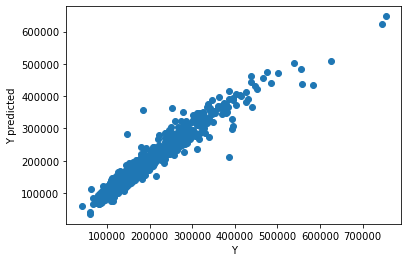

In [250]:
plt.scatter(y_train,y_pred_train)
plt.xlabel('Y')
plt.ylabel('Y predicted')

#### Validation

In [251]:
y_pred_val = model.predict(X_val)

In [252]:
r2_score(y_val, y_pred_val)

0.8790774620622841

Text(0, 0.5, 'Y predicted')

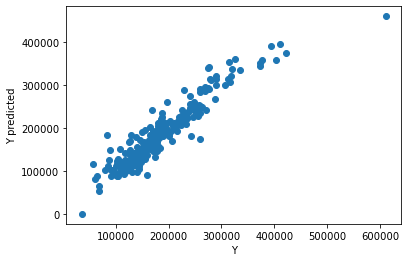

In [253]:
plt.scatter(y_val,y_pred_val)
# plt.ylim(40000,350000)
plt.xlabel('Y')
plt.ylabel('Y predicted')

#### Test

In [254]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [255]:
processed_test_df = processor.transform(test_df)

In [256]:
processed_test_df.shape

(1459, 260)

In [257]:
processed_trained_df.shape

(1338, 261)

In [258]:
y_pred_test = model.predict(processed_test_df)

In [259]:
y_pred_test.shape

(1459,)

In [261]:
y_lr_df = pd.DataFrame(y_pred_test)

In [262]:
y_lr_df.to_csv(r"D:\Desafios Programação\housing-prices\testLinearRegression.csv")